## NLP Project

#### This part of the project is planned to have the following functions:
---
1. Load the csv files in the `daily_scrape_files` folder.
2. Create a dataframe with all the information
3. Either seperate out the details and description column, or load them separately.
4. Take details column and create yes/no columns for later machine learning.
5. Export new dataframe with columns to CSV / database
6. Take description column and run NLP on it to find possible correlation with description and rent or location
7. Export NLP results to another file for visualization / to a database (MongoDB here?)

#### Future Hopes and Wishes
---
1. Create classes to handle related functions
2. Separate classes and functions to new files if necessary
3. Use data config JSON to specify properties

***

## Imports

In [58]:
import numpy as np
import pandas as pd
from glob import glob
import seaborn as sns

In [59]:

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, r2_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV
import time
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Load files from scraped folder into dataframe

In [60]:
csv_files = glob('daily_scrape_files/*.csv')
sorted(csv_files)




['daily_scrape_files/apartments_for_rent_AustinTX_2020-01-29.csv',
 'daily_scrape_files/apartments_for_rent_AustinTX_2020-01-30.csv',
 'daily_scrape_files/apartments_for_rent_AustinTX_2020-01-31.csv',
 'daily_scrape_files/apartments_for_rent_AustinTX_2020-02-03.csv',
 'daily_scrape_files/apartments_for_rent_AustinTX_2020-02-04.csv',
 'daily_scrape_files/apartments_for_rent_AustinTX_2020-02-05.csv',
 'daily_scrape_files/apartments_for_rent_AustinTX_2020-02-06.csv',
 'daily_scrape_files/apartments_for_rent_AustinTX_2020-02-07.csv',
 'daily_scrape_files/apartments_for_rent_AustinTX_2020-02-08.csv',
 'daily_scrape_files/apartments_for_rent_AustinTX_2020-02-09.csv',
 'daily_scrape_files/apartments_for_rent_AustinTX_2020-02-10.csv']

In [61]:
df = pd.DataFrame()

In [62]:
for csv_file in sorted(csv_files):
    data = pd.read_csv(csv_file)
    df = pd.concat([df, data], ignore_index=True)

In [63]:
df.sample(10)

,name,address,unit,sqft,bed,bath,price,city,state,zipcode,description,details,url,date
34557,Residences at Saltillo,1211 E 5th St,Unit 1-1212,1054,2.0,2.0,2627,Austin,TX,78702,"Welcome to Residences at Saltillo, East Austin...","Apartment ,Cats, small dogs, large dogs allowe...",https://www.trulia.com/c/tx/austin/residences-...,2020-02-08
38978,The Davis SoCo Apartments,3809 S Congress Ave,Unit 465,652,1.0,1.0,1486,Austin,TX,78704,"Where SoCo begins, reserve your Urban Rental t...","Apartment ,Cats, small dogs, large dogs allowe...",https://www.trulia.com/c/tx/austin/the-davis-s...,2020-02-09
15808,Marquis at Caprock Canyon Apartments,4411 Spicewood Springs Rd,Unit 705,763,1.0,1.0,1829,Austin,TX,78731,Enhancing Lives the CWS Way! Nestled away in t...,"Apartment ,Cats, small dogs, large dogs allowe...",https://www.trulia.com/c/tx/austin/marquis-at-...,2020-02-03
26552,Marquis Parkside Apartments,12820 N Lamar Blvd,Unit 924,684,1.0,1.0,1106,Austin,TX,78753,Experience luxury living in North Austin. Marq...,"Apartment ,Cats, small dogs, large dogs allowe...",https://www.trulia.com/c/tx/austin/marquis-par...,2020-02-06
11790,Solaris Apartments,1601 Royal Crest Dr,Unit 1163,1200,2.0,1.5,1308,Austin,TX,78741,"The Solaris community in Austin, Texas invites...","Apartment ,Cats, small dogs, large dogs allowe...",https://www.trulia.com/c/tx/austin/solaris-160...,2020-01-31
10572,Windsor South Lamar Apartments,809 S Lamar Blvd,B7,1235,2.0,2.0,2738,Austin,TX,78704,"Perched atop a hill overlooking the city, the ...","Apartment ,Cats, small dogs, large dogs allowe...",https://www.trulia.com/c/tx/austin/windsor-sou...,2020-01-31
34077,Folio Apartments,11915 Stonehollow Dr,Unit 1033,602,1.0,1.0,1169,Austin,TX,78758,"In addition to offering some of the best one, ...","Apartment ,Cats, small dogs, large dogs allowe...",https://www.trulia.com/c/tx/austin/folio-11915...,2020-02-08
21149,The Violet Apartments,409 E William Cannon Dr,Unit 172,575,1.0,1.0,995,Austin,TX,78745,2019 Austin Apartment Association Property Of ...,"Apartment ,Cats, small dogs, large dogs allowe...",https://www.trulia.com/c/tx/austin/the-violet-...,2020-02-05
30007,12403 Mellow Meadow Drive Apartments,12403 Mellow Meadow Dr,Unit G203,948,2.0,2.0,1135,Austin,TX,78750,Fabulous renovations in a prime location- Welc...,"Apartment ,Cats, small dogs, large dogs allowe...",https://www.trulia.com/c/tx/austin/12403-mello...,2020-02-07
5101,The Saint Mary Apartments,7500 W Slaughter Ln,Unit 7206,903,1.0,1.0,1495,Austin,TX,78749,Brand New Luxury Living The Saint Mary is a br...,"Apartment ,Cats, small dogs allowed ,Built in ...",https://www.trulia.com/c/tx/austin/the-saint-m...,2020-01-30


## Details Column

In [64]:
for detail in df.details.sample(5):
    print(detail)
    print('')

Apartment ,Cats, small dogs allowed ,Built in 2015 ,Parking: Garage Detached ,Deposit: $300 ,Bicycle Storage ,Rooftop Deck ,Undermount Sinks ,Game Room ,Community Kitchen ,Health Club & Wellness Studio ,Corner Unit ,USB Outlets ,EV Charging Station ,Free Fitness Classes & Virtual Fitness ,Stainless Appliances ,Smartphone Controllable Thermostats ,Pet Washing Station ,Sunning Areas and Outdoor TVs ,Tile Backsplash ,Quartz Counter-tops ,Keyless Unit Locks ,Wood Style Floors ,Balcony ,Courtyard ,Deck ,Garage ,Pool ,Great Views ,Elevator

Apartment ,Cats, small dogs, large dogs allowed ,Built in 2019 ,Parking: Off Street ,Co-working areas ,Hospitality inspired clubroom ,Sleek custom cabinetry ,Spacious closets w/custom wood shelving ,Poolside climate controlled entertainment space ,Oversized, energy efficient windows ,Airy 10' ceilings ,Attached & detached garages ,Parking Type: covered ,Live/Work flex space ,Mud rooms at entry ,Outdoor kitchen w/gas grills ,Quartz countertops ,Under-cabin

In [65]:
list_of_details = ['cats', 'small dogs', 'large dogs', 'game room', 'ev charging', 'granite', 'gourmet', 'open living',
                  'walk-in', 'stainless', 'balcony', 'fireplace', 'pool', 'elevator', 'pet park', 'fitness center',
                  'club house', 'dishwasher', 'disposal', 'hot tub', 'spa']

In [66]:
for detail in list_of_details:
    detail_col_name = detail.replace(' ', '_').replace('-', '_')
    df[detail_col_name] = df['details'].apply(lambda x: 1 if detail in x.lower() else 0)
    df['details'] = df['details'].apply(lambda x: x.lower().replace(detail,''))

In [67]:
df.sample(10)

,name,address,unit,sqft,bed,bath,price,city,state,zipcode,...,fireplace,pool,elevator,pet_park,fitness_center,club_house,dishwasher,disposal,hot_tub,spa
6036,Overture Arboretum 60+ Apartment Homes,10600 Jollyville Rd,Unit 403,1174,2.0,2.0,3475,Austin,TX,78759,...,0,1,1,1,1,1,1,0,1,1
24244,Windsor Lantana Hills Apartments,6601 Rialto Blvd,Unit 8316,1478,3.0,2.0,2330,Austin,TX,78735,...,1,1,0,0,1,1,0,0,0,1
12321,"2 bed, 2.0 bath, 1080 sqft, $2,247",1529 Barton Springs Rd,2 Bed 2.0 Bath,1080,2.0,2.0,2247,Austin,TX,78704,...,0,1,1,0,0,0,1,1,0,0
3728,St Johns West Apartments,601 W Saint Johns Ave,Unit 2219,560,1.0,1.0,994,Austin,TX,78752,...,0,1,1,0,1,0,1,1,0,0
27534,Citadel at Tech Ridge Apartments,1127 Pearl Retreat Ln,Unit 2307,629,1.0,1.0,1195,Austin,TX,78753,...,0,1,0,1,0,1,0,0,0,0
8154,Mission James Place Apartments,4009 Victory Dr,Unit A301,916,2.0,2.0,1418,Austin,TX,78704,...,1,1,0,1,1,0,0,0,0,0
12941,Lantower Techridge Apartments,14233 The Lakes Blvd,Unit 1126,690,1.0,1.0,1155,Austin,TX,78728,...,0,0,0,1,1,1,0,0,0,0
42570,Val Dor Flats Apartments,1521 Reagan Hill Dr,Unit 201,337,0.0,1.0,899,Austin,TX,78752,...,0,0,0,0,0,0,0,0,0,0
15966,Ashton Austin Apartments,101 Colorado St,Unit 2003,1345,2.0,2.0,4002,Austin,TX,78701,...,0,1,1,0,1,1,0,0,1,1
6501,Aura Riverside Apartments,6107 E Riverside Dr,Unit 430,771,1.0,1.0,1715,Austin,TX,78741,...,0,0,0,0,0,0,0,0,0,0


In [68]:
df.sort_values(by='price')

,name,address,unit,sqft,bed,bath,price,city,state,zipcode,...,fireplace,pool,elevator,pet_park,fitness_center,club_house,dishwasher,disposal,hot_tub,spa
42676,Tempo at Riverside Apartments,4700 E Riverside Dr,Unit 522,1050,3.0,2.0,465,Austin,TX,78741,...,0,1,0,1,1,0,1,0,1,1
38228,Tempo at Riverside Apartments,4700 E Riverside Dr,Unit 522,1050,3.0,2.0,465,Austin,TX,78741,...,0,1,0,1,1,0,1,0,1,1
38229,Tempo at Riverside Apartments,4700 E Riverside Dr,Unit 531,1050,3.0,2.0,465,Austin,TX,78741,...,0,1,0,1,1,0,1,0,1,1
16708,Tempo at Riverside Apartments,4700 E Riverside Dr,Unit 533,1050,3.0,2.0,465,Austin,TX,78741,...,0,1,0,1,1,0,1,0,1,1
42677,Tempo at Riverside Apartments,4700 E Riverside Dr,Unit 531,1050,3.0,2.0,465,Austin,TX,78741,...,0,1,0,1,1,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24296,Ashton Austin Apartments,101 Colorado St,Unit 3603,2527,2.0,2.5,13413,Austin,TX,78701,...,0,1,1,0,1,1,0,0,1,1
15980,Ashton Austin Apartments,101 Colorado St,Unit 3602,3218,3.0,3.5,13413,Austin,TX,78701,...,0,1,1,0,1,1,0,0,1,1
15979,Ashton Austin Apartments,101 Colorado St,PC3.5A,3218,3.0,3.5,13413,Austin,TX,78701,...,0,1,1,0,1,1,0,0,1,1
6977,Ashton Austin Apartments,101 Colorado St,Unit 3602,3218,3.0,3.5,13413,Austin,TX,78701,...,0,1,1,0,1,1,0,0,1,1


In [69]:
df = pd.get_dummies(df, columns=['zipcode'], drop_first=True)

In [70]:
df.head()

,name,address,unit,sqft,bed,bath,price,city,state,description,...,zipcode_78749,zipcode_78750,zipcode_78751,zipcode_78752,zipcode_78753,zipcode_78754,zipcode_78756,zipcode_78757,zipcode_78758,zipcode_78759
0,Bainbridge Villas Apartments,3603 Southridge Dr,B-U1,874,2.0,1.5,1200,Austin,TX,Exciting renovations are underway and we'll be...,...,0,0,0,0,0,0,0,0,0,0
1,Bainbridge Villas Apartments,3603 Southridge Dr,B-1,874,2.0,1.5,1150,Austin,TX,Exciting renovations are underway and we'll be...,...,0,0,0,0,0,0,0,0,0,0
2,Amor Apartment Homes,1200 Mearns Meadow Blvd,A2,545,1.0,1.0,852,Austin,TX,"Welcome to Amor Apartment Homes, conveniently ...",...,0,0,0,0,0,0,0,0,1,0
3,Amor Apartment Homes,1200 Mearns Meadow Blvd,Unit 01-201,545,1.0,1.0,852,Austin,TX,"Welcome to Amor Apartment Homes, conveniently ...",...,0,0,0,0,0,0,0,0,1,0
4,Amor Apartment Homes,1200 Mearns Meadow Blvd,Unit 02-114,545,1.0,1.0,852,Austin,TX,"Welcome to Amor Apartment Homes, conveniently ...",...,0,0,0,0,0,0,0,0,1,0


## Machine Learning

In [71]:
df.columns

Index(['name', 'address', 'unit', 'sqft', 'bed', 'bath', 'price', 'city',
       'state', 'description', 'details', 'url', 'date', 'cats', 'small_dogs',
       'large_dogs', 'game_room', 'ev_charging', 'granite', 'gourmet',
       'open_living', 'walk_in', 'stainless', 'balcony', 'fireplace', 'pool',
       'elevator', 'pet_park', 'fitness_center', 'club_house', 'dishwasher',
       'disposal', 'hot_tub', 'spa', 'zipcode_78660', 'zipcode_78701',
       'zipcode_78702', 'zipcode_78703', 'zipcode_78704', 'zipcode_78705',
       'zipcode_78717', 'zipcode_78722', 'zipcode_78723', 'zipcode_78724',
       'zipcode_78726', 'zipcode_78727', 'zipcode_78728', 'zipcode_78729',
       'zipcode_78731', 'zipcode_78732', 'zipcode_78735', 'zipcode_78736',
       'zipcode_78737', 'zipcode_78738', 'zipcode_78741', 'zipcode_78744',
       'zipcode_78745', 'zipcode_78746', 'zipcode_78747', 'zipcode_78748',
       'zipcode_78749', 'zipcode_78750', 'zipcode_78751', 'zipcode_78752',
       'zipcode_78753', '

In [72]:
not_features = ['name', 'address', 'unit', 'price', 'city', 'state', 'description',
                'details', 'url', 'date']

features = [col for col in df.columns if col not in not_features]

In [74]:
X = df[features]
y = df['price']

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7)

In [76]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(34936, 60) (34936,)
(11646, 60) (11646,)


In [77]:
ss = StandardScaler()
ss.fit(X_train)
X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

In [78]:
X_train[0]

array([ 2.16261605e-01,  9.32084083e-01, -7.12719223e-01,  2.78996664e-01,
        2.61494178e-01,  7.85085834e-01, -4.96768760e-01, -1.11762889e-01,
       -6.78897315e-01, -2.56333358e-01, -8.64229572e-02, -7.16173793e-01,
       -7.84990583e-01, -8.55113460e-01, -4.90490515e-01,  5.36356506e-01,
        1.75143605e+00, -9.50338474e-01,  7.28148451e-01, -8.03393331e-01,
       -5.77746892e-01, -3.70508575e-01, -2.79115835e-01,  1.38435440e+00,
       -1.42990607e-01, -2.50770816e-01, -2.15250144e-01, -1.25061762e-01,
       -2.84676901e-01, -1.37472689e-01, -2.10326430e-01, -7.79507145e-02,
       -1.67552040e-01, -8.77576476e-02, -7.03395123e-02, -1.27402161e-01,
       -1.14359739e-01, -1.77149447e-01, -7.53051116e-02, -5.35019519e-03,
       -1.97455938e-01, -6.78297440e-02, -3.89790294e-02, -5.99234428e-02,
       -3.42711806e-01, -7.73912357e-02, -1.10309881e-01, -1.62333378e-01,
       -1.51341535e-02, -1.57723776e-01, -2.02946643e-01, -1.07756247e-01,
        8.71501818e+00, -

In [79]:
lm = LinearRegression()
lm = RidgeCV(alphas=np.linspace(.1, 10, 100))

In [81]:
scores = cross_val_score(lm, X_train, y_train, cv = 5)    #cv is the number of folds, scores will give an array of scores

print(np.mean(scores), np.std(scores))

0.7292218498642685 0.005732740127428813


In [82]:
#To get predictions (y_hat) and check them all in one using cross validation

predictions = cross_val_predict(lm, X_test, y_test, cv = 5)     #y_test is needed here in predictions to get scores for each fold of cv

accuracy = r2_score(y_test, predictions)  #this says the accuracy of the predictions from the best cv fold
print(accuracy)

0.7340046801969506


In [83]:
#If this is good, continue to fit the model on the data


lm.fit(X_train, y_train)

y_pred = lm.predict(X_test)      #this gives me my predictions

lm.score(X_test, y_test)     #this tells me my model performance

0.735190278293697

In [132]:
coefficients = list(lm.coef_)

In [147]:
coef_df = pd.DataFrame(coefficients, index=features, columns=['coefficient'])
# coef_df.loc[0] = coefficients

In [159]:
sorted_coef = coef_df.sort_values(by='coefficient', ascending=False)['coefficient']

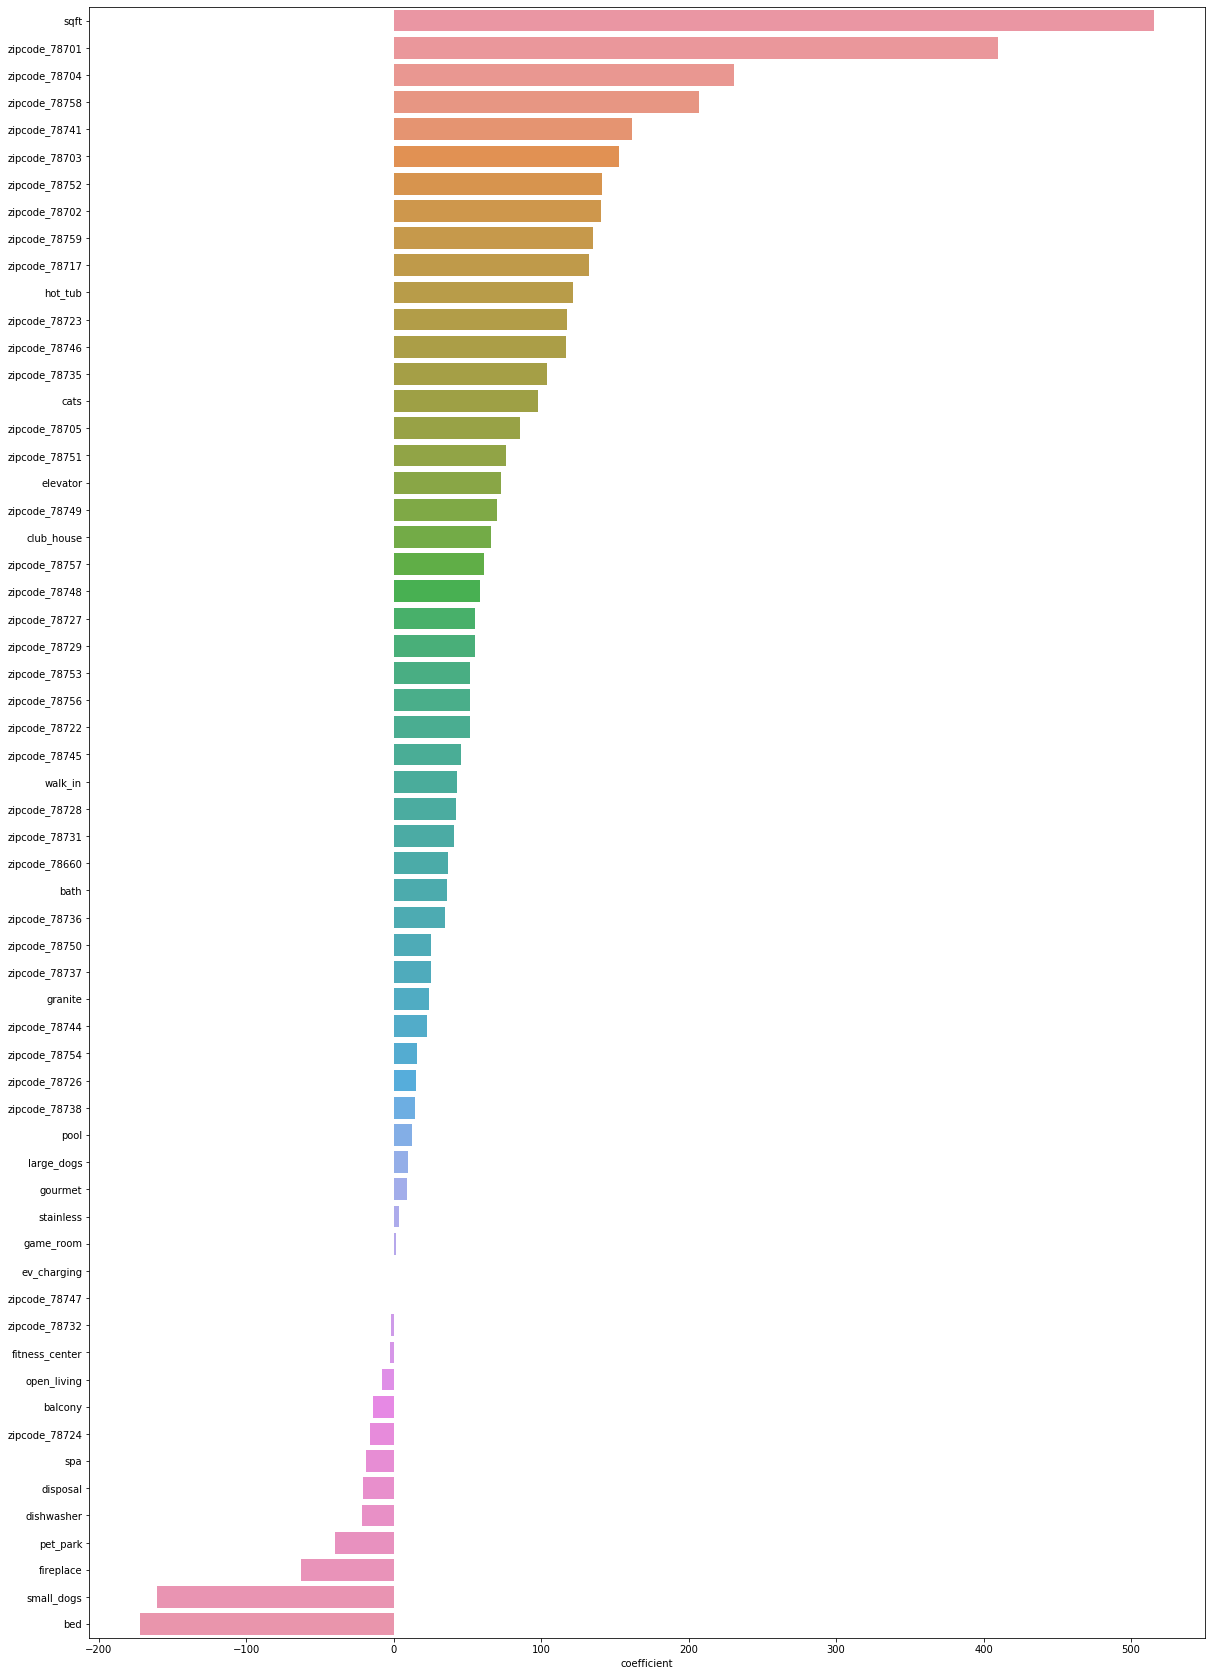

In [160]:
fig, ax = plt.subplots(figsize=(20,30))
sns.barplot(x = sorted_coef, y = sorted_coef.index);

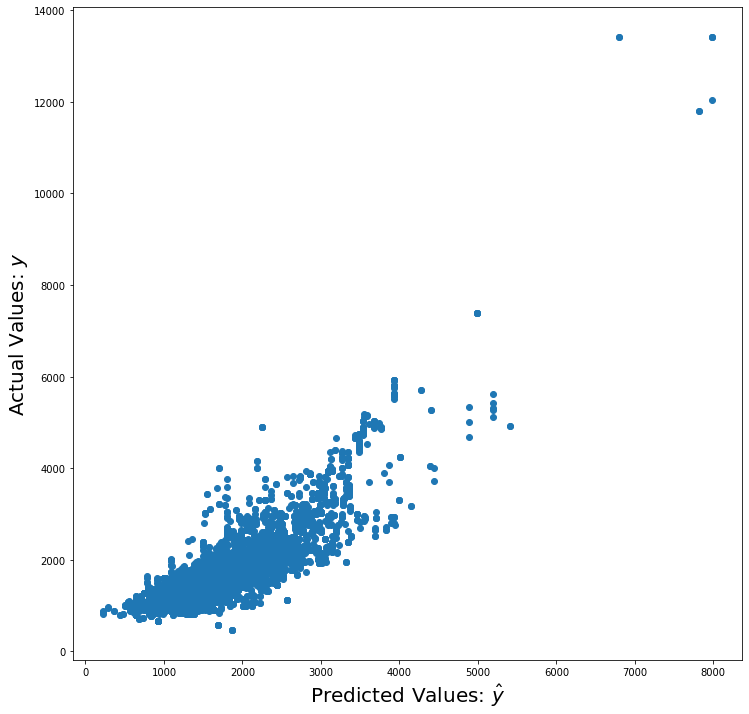

In [86]:
# Plot the model
plt.figure(figsize=(12,12))

# Generate a scatterplot of predicted values versus actual values.
plt.scatter(y_pred, y_test)
plt.xlabel("Predicted Values: $\hat{y}$", size=20)
plt.ylabel("Actual Values: $y$", size=20);